<a href="https://colab.research.google.com/github/minhajuddinali/zero_day_attack/blob/main/IDS_DECISIONTREECLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [6]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!mkdir  ~/.kaggle
!touch ~/.kaggle/kaggle.json

In [8]:
!cp kaggle.json ~/.kaggle


In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, re, time, math, tqdm, itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
!kaggle datasets download solarmainframe/ids-intrusion-csv

 99% 1.58G/1.60G [00:15<00:00, 158MB/s]
100% 1.60G/1.60G [00:15<00:00, 109MB/s]


In [11]:
! unzip ids-intrusion-csv.zip

Archive:  ids-intrusion-csv.zip
  inflating: 02-14-2018.csv          
  inflating: 02-15-2018.csv          
  inflating: 02-16-2018.csv          
  inflating: 02-20-2018.csv          
  inflating: 02-21-2018.csv          
  inflating: 02-22-2018.csv          
  inflating: 02-23-2018.csv          
  inflating: 02-28-2018.csv          
  inflating: 03-01-2018.csv          
  inflating: 03-02-2018.csv          


In [12]:
data = pd.read_csv("02-14-2018.csv")

In [13]:
data.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [14]:
data['Label'].value_counts()


Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: Label, dtype: int64

In [15]:
# check the shape of data
data.shape

(1048575, 80)

In [18]:
# check the number of rows and columns
print('Number of Rows (Samples): %s' % str((data.shape[0])))
print('Number of Columns (Features): %s' % str((data.shape[1])))

Number of Rows (Samples): 1048575
Number of Columns (Features): 80


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 55 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   Dst Port           1048575 non-null  int64 
 1   Protocol           1048575 non-null  int64 
 2   Flow Duration      1048575 non-null  int64 
 3   Tot Fwd Pkts       1048575 non-null  int64 
 4   Tot Bwd Pkts       1048575 non-null  int64 
 5   TotLen Fwd Pkts    1048575 non-null  int64 
 6   TotLen Bwd Pkts    1048575 non-null  int64 
 7   Fwd Pkt Len Max    1048575 non-null  int64 
 8   Fwd Pkt Len Min    1048575 non-null  int64 
 9   Bwd Pkt Len Max    1048575 non-null  int64 
 10  Bwd Pkt Len Min    1048575 non-null  int64 
 11  Flow IAT Max       1048575 non-null  int64 
 12  Flow IAT Min       1048575 non-null  int64 
 13  Fwd IAT Tot        1048575 non-null  int64 
 14  Fwd IAT Max        1048575 non-null  int64 
 15  Fwd IAT Min        1048575 non-null  int64 
 16  

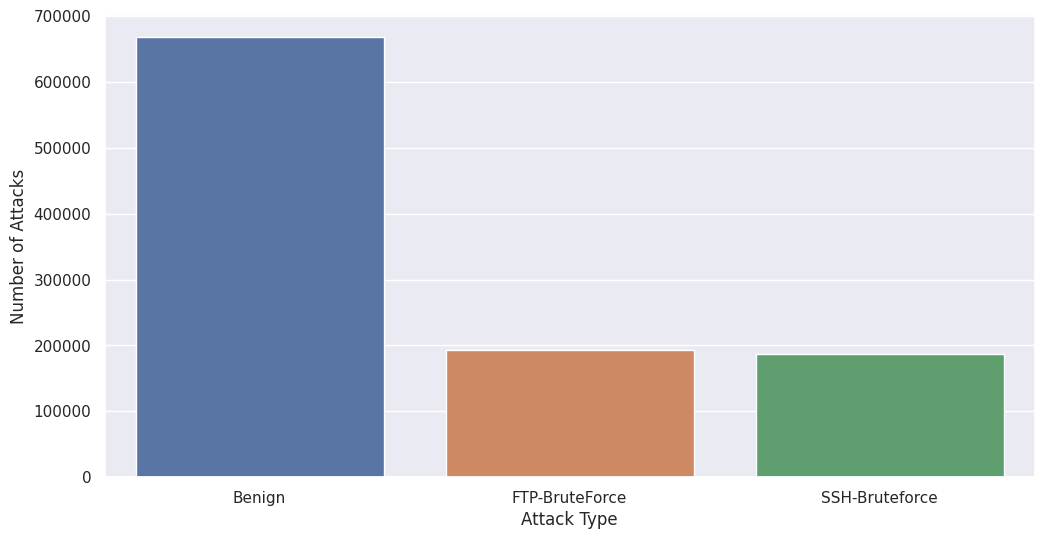

In [42]:
# make a plot number of labels
sns.set(rc={'figure.figsize':(12, 6)})
plt.xlabel('Attack Type')
sns.set_theme()
ax = sns.countplot(x='Label', data=data)
ax.set(xlabel='Attack Type', ylabel='Number of Attacks')
plt.show()

In [43]:
X = data.drop(["Label"], axis=1)
y = data["Label"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [44]:

# Create the decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
columns=data.columns

In [38]:
data= data.select_dtypes(exclude=['float64'])

In [39]:
len(data.columns)

55

In [45]:
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
acc_score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
conf_mat = confusion_matrix(y_test, y_pred)

print("Accuracy score:", acc_score)
print("F1 score:", f1)
print("Confusion matrix:\n", conf_mat)

Accuracy score: 0.999971389743223
F1 score: 0.999971389711799
Confusion matrix:
 [[133397      0      0]
 [     0  38689      0]
 [     0      6  37623]]


In [46]:
y_pred

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)